In [4]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

In [3]:
pip install tensorflow

  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\kkhairnar\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
from keras.models import Model, Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
# from keras.layers.normalization import BatchNormalization
from keras.layers import BatchNormalization
import os
import seaborn as sns

print(os.listdir("C:/Users/kkhairnar/Com_Vision/basedata/train"))

['AmortizationSchedule', 'NameAffidavit', 'PatriotActDisclosure', 'Paystub', 'PhotoPage', 'StandardFloodHazardDetermination', 'URLA']


In [6]:
SIZE = 128

# Train
train_images = []
train_labels = []
for directory_path in glob.glob("C:/Users/kkhairnar/Com_Vision/basedata/train/*"):
    label = directory_path.split("//")[-1]
#     print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
#         print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# print(train_images)
# print(train_labels)


In [7]:
# Test

test_images = []
test_labels = []
for directory_path in glob.glob("C:/Users/kkhairnar/Com_Vision/basedata/validation/*"):
    doc_label = directory_path.split("//")[-1]
#     print(doc_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
#         print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(doc_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)
# print(test_images)
# print(test_labels)

In [10]:
# Encode labels from text to integers

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

print(test_labels_encoded)
print(train_labels_encoded)


[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6]


In [11]:
# Split data into test and train datasets
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [12]:
# rescale pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [13]:
# One hot encode y values for neural network
# from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_train_one_hot)
print(y_test_one_hot)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0.

In [14]:
activation = 'sigmoid'

feature_extractor = Sequential()
feature_extractor.add(Convolution2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Convolution2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Convolution2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Convolution2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())

#Add layers for deep learning prediction
x = feature_extractor.output  
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(7, activation = 'softmax')(x)

# Make a new model combining both feature extractor and x
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary()) 


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0     

In [15]:
#Train the CNN model
history = cnn_model.fit(x_train, y_train_one_hot, epochs=60, validation_data = (x_test, y_test_one_hot))

Epoch 1/60
14/14 [==============================] - 29s 2s/step - loss: 2.0644 - accuracy: 0.3619 - val_loss: 2.4745 - val_accuracy: 0.1429
Epoch 2/60
14/14 [==============================] - 29s 2s/step - loss: 1.1793 - accuracy: 0.6786 - val_loss: 2.4761 - val_accuracy: 0.1429
Epoch 3/60
14/14 [==============================] - 29s 2s/step - loss: 0.6892 - accuracy: 0.7833 - val_loss: 2.4252 - val_accuracy: 0.1429
Epoch 4/60
14/14 [==============================] - 41s 3s/step - loss: 0.3561 - accuracy: 0.9500 - val_loss: 2.5389 - val_accuracy: 0.1429
Epoch 5/60
14/14 [==============================] - 55s 4s/step - loss: 0.2213 - accuracy: 0.9857 - val_loss: 2.7257 - val_accuracy: 0.1429
Epoch 6/60
14/14 [==============================] - 49s 3s/step - loss: 0.1557 - accuracy: 0.9976 - val_loss: 3.0341 - val_accuracy: 0.1429
Epoch 7/60
14/14 [==============================] - 40s 3s/step - loss: 0.1032 - accuracy: 1.0000 - val_loss: 3.2326 - val_accuracy: 0.1429
Epoch 8/60
14/14 [==

14/14 [==============================] - 38s 3s/step - loss: 4.6778e-04 - accuracy: 1.0000 - val_loss: 0.0380 - val_accuracy: 1.0000
Epoch 59/60
14/14 [==============================] - 50s 4s/step - loss: 4.4060e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 60/60
14/14 [==============================] - 47s 3s/step - loss: 4.1416e-04 - accuracy: 1.0000 - val_loss: 7.7830e-04 - val_accuracy: 1.0000


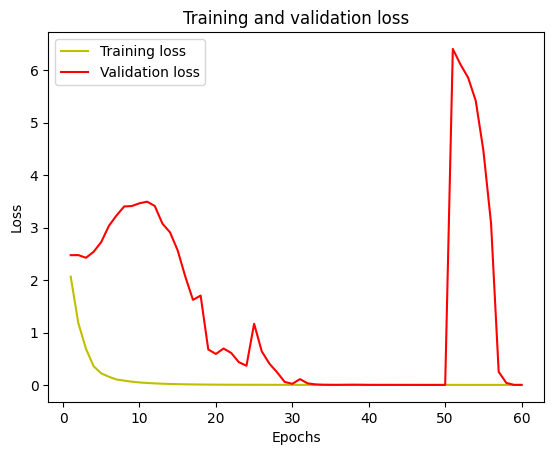

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

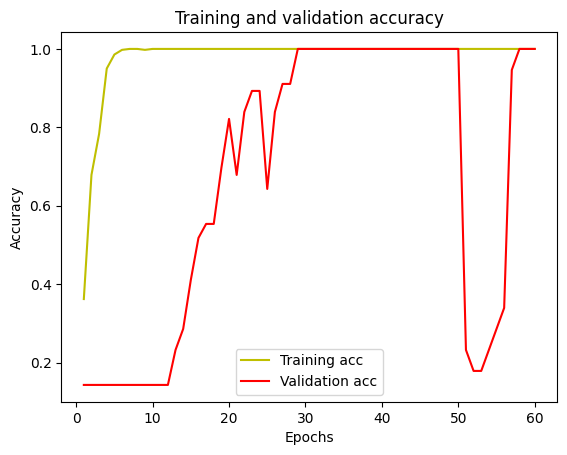

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 40ms/step
The prediction for this image is:  ['C:/Users/kkhairnar/Com_Vision/basedata/train\\NameAffidavit']
The actual label for this image is:  C:/Users/kkhairnar/Com_Vision/basedata/validation\NameAffidavit


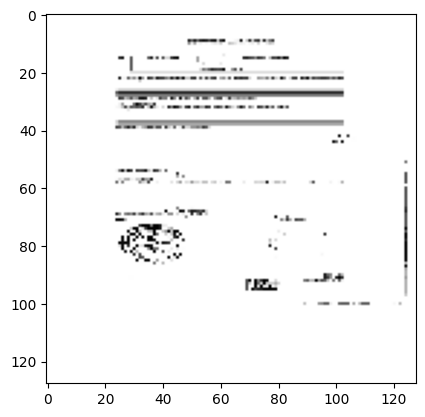

In [18]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
# print(cm)
# sns.heatmap(cm, annot=True)




n=13  #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
# plt.imshow(img)
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

2/2 [==============================] - 1s 214ms/step
Accuracy =  0.0


<AxesSubplot: >

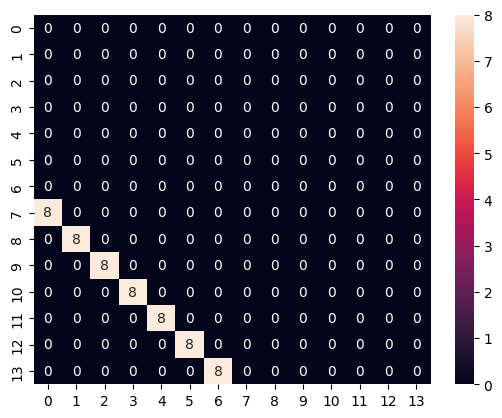

In [19]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN1 = le.inverse_transform(prediction_NN)

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN1)
# print(cm)
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_NN1))
sns.heatmap(cm, annot=True)

In [24]:
# from csv import writer
# fields = ['prediction', 'test_labels']
# filename = 'pred2.csv'
# sr = []
# with open(filename, 'a', newline='\n') as f_object:
#     for row in prediction_NN1:
#         sr.append(prediction_NN1)
    
#         rows = [prediction_NN1, test_labels]
    

# print(prediction_NN1)
# writer_object = writer(f_object)
# read_mode = open('pred2.csv', 'r')
# if read_mode.readlines() == []:
#     writer_object.writerow(fields)
#     writer_object.writerow(rows)


['C:/Users/kkhairnar/Com_Vision/basedata/train\\AmortizationSchedule'
 'C:/Users/kkhairnar/Com_Vision/basedata/train\\AmortizationSchedule'
 'C:/Users/kkhairnar/Com_Vision/basedata/train\\AmortizationSchedule'
 'C:/Users/kkhairnar/Com_Vision/basedata/train\\AmortizationSchedule'
 'C:/Users/kkhairnar/Com_Vision/basedata/train\\AmortizationSchedule'
 'C:/Users/kkhairnar/Com_Vision/basedata/train\\AmortizationSchedule'
 'C:/Users/kkhairnar/Com_Vision/basedata/train\\AmortizationSchedule'
 'C:/Users/kkhairnar/Com_Vision/basedata/train\\AmortizationSchedule'
 'C:/Users/kkhairnar/Com_Vision/basedata/train\\NameAffidavit'
 'C:/Users/kkhairnar/Com_Vision/basedata/train\\NameAffidavit'
 'C:/Users/kkhairnar/Com_Vision/basedata/train\\NameAffidavit'
 'C:/Users/kkhairnar/Com_Vision/basedata/train\\NameAffidavit'
 'C:/Users/kkhairnar/Com_Vision/basedata/train\\NameAffidavit'
 'C:/Users/kkhairnar/Com_Vision/basedata/train\\NameAffidavit'
 'C:/Users/kkhairnar/Com_Vision/basedata/train\\NameAffidavit'

ValueError: I/O operation on closed file.

0
Prediction1:  ['C:/Users/kkhairnar/Com_Vision/basedata/train\\AmortizationSchedule']
Actual label:  C:/Users/kkhairnar/Com_Vision/basedata/validation\AmortizationSchedule


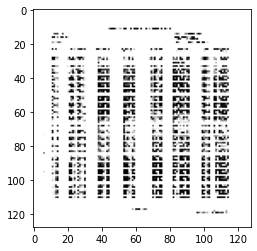

In [28]:
fields = ['prediction', 'test_labels']

n=1

#Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
print(prediction)
prediction1 = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("Prediction1: ", prediction1)
print("Actual label: ", test_labels[n])

filename = 'pred2.csv'

with open(filename, 'a', newline='\n') as f_object:
    writer_object = writer(f_object)
    read_mode = open('pred2.csv', 'r')
    rows = [
        prediction1,
        test_labels[n],
    ]
    if read_mode.readlines() == []:
        writer_object.writerow(fields)

    writer_object.writerow(rows)

# prediction from Random Forest classifier

In [43]:
X_for_RF = feature_extractor.predict(x_train) #This is out X input to RF

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

Accuracy =  0.0


<AxesSubplot:>

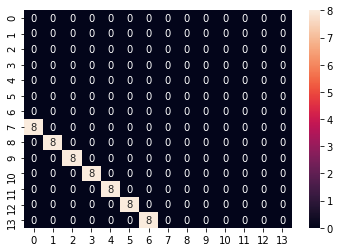

In [44]:
# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

#Send test data through same feature extractor process
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_feature)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

The prediction for this image is:  ['C:/Users/kkhairnar/Com_Vision/basedata/train\\URLA']
The actual label for this image is:  C:/Users/kkhairnar/Com_Vision/basedata/validation\URLA


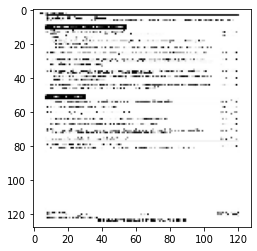

In [50]:
n=49 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

In [6]:
import numpy as np 
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization
from keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
# from tensorflow.keras.utils import to_categorical


# Read input images and assign labels based on folder names
# print(os.listdir("C:/Users/kkhairnar/Com_Vision/basedata/train"))

SIZE = 256  #Resize images

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob("C:/Users/kkhairnar/Com_Vision/basedata/train/*"):
    label = directory_path.split("\\")[-1]
#     print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
#         print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)


# Capture test/validation data and labels into respective lists

test_images = []
test_labels = [] 
for directory_path in glob.glob("images/validation/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

###################################################################
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#One hot encode y values for neural network. 
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#############################
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()  #Trainable parameters will be 0


#Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_RF = features #This is our X input to RF

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

#Print overall accuracy
from sklearn import metrics
# print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[6]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

ImportError: cannot import name 'to_categorical' from 'keras.utils' (C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\__init__.py)

In [ ]:
from keras import utils

utils.to_categorical(...)

In [ ]:
np.array